In [25]:
#import Dependencies 

#matplot
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pandas.plotting import table
import os
import seaborn as sns
import plotly as py

#import password
from config import password

#SQLAlchemy
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [43]:
df = pd.read_csv(os.path.join("..", "data", "Salaries.csv"))
# Drop the null columns where all values are null
#df = df.dropna(axis='columns', how='all')
# Drop the null rows
#df = df.dropna()
df.head(1000)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
995,1986,NYA,AL,mattido01,1375000
996,1986,NYA,AL,montejo01,716667
997,1986,NYA,AL,morenom01,500000
998,1986,NYA,AL,niekrjo01,750000


Text(0.5, 1, 'yearID vs salary')

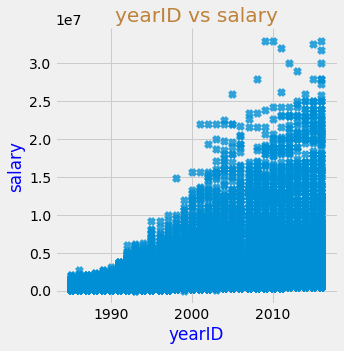

In [45]:
sns.lmplot("yearID", "salary", data=df, markers="x")
plt.xlabel("yearID",color='blue')
plt.ylabel("salary",color='blue')
plt.title("yearID vs salary", color='#BE823A')

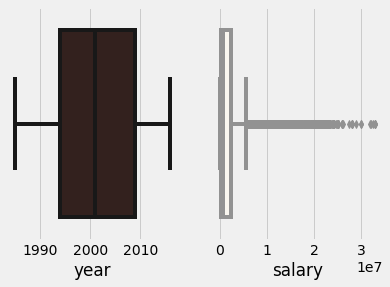

In [46]:
fig = plt.figure()

plt.subplot(1, 2, 1)
sns.boxplot(df["yearID"],color='#361F1B')
plt.xlabel("year")

plt.subplot(1, 2, 2)
sns.boxplot(df["salary"],color='#fbf7ed')
plt.xlabel("salary")

plt.show()

## Create a connection to SQL 

In [47]:
pg_user = 'postgres'
pg_password = password
db_name = 'baseball_analysis'

connection_string = f"{pg_user}:{pg_password}@localhost:5432/{db_name}"
engine = create_engine(f'postgresql://{connection_string}')

In [48]:
engine.table_names()

['Batting', 'People', 'Pitching']

In [49]:
#write to sql
df.to_sql(name = "Salaries", con=engine, if_exists='append', index=False)

In [50]:
#confirm data has been loaded to sql table
pd.read_sql_query('select * from Salaries', con=engine).head()

ProgrammingError: (psycopg2.errors.UndefinedTable) relation "salaries" does not exist
LINE 1: select * from Salaries
                      ^

[SQL: select * from Salaries]
(Background on this error at: http://sqlalche.me/e/f405)